In [40]:
class MaxHeapq:
    ''' 
    Class for priority queue stored as a max heap

    Attributes
	----------
	heap : list
    	A list storing tuples (computed_priority, task) in Max heap order
	'''  

    def __init__(self):    
        '''
        Initializes an empty  max heap
        '''    
        self.heap       = []
        
    def left(self, i):
        '''
        Given parent node's index, finds the index of the left child node

        Parameters
        ----------
        i: int
          Parent node's index 

        Returns
        ----------
        int
          Left child node's index
        '''
        return 2 * i + 1

    def right(self, i):
        '''
        Given parent node's index, finds the index of the right child node
        
        Parameters
        ----------
        i: int
            Parent node's index 

        Returns
        ----------
        int
            Right child node's index
        '''
        return 2 * i + 2
		
    def parent(self, i):
        '''
        Given a child node's index, finds the index of the parent node

        Parameters
        ----------
        i: int
            Child node's index

        Returns
        ----------
        int
            Parent node's index, or None if i is 0
        '''
        if i == 0:
            return None
        return (i - 1)//2
  
    def heappush(self, key):  
        '''
        Insert the new element into the heap, maintaining the heap property
        
        Parameters
        ----------
        key: tuple
            A tuple (computed_priority, task) to insert
        '''
        self.heap.append(key)
        
        i = len(self.heap) - 1
        # Move the element to maintain the max heap property 
        while i > 0 and self.heap[self.parent(i)][0:2] < self.heap[i][0:2]:
            parent_index = self.parent(i)
            self.heap[i], self.heap[parent_index] = self.heap[parent_index], self.heap[i]
            i = parent_index
       
    def heapify(self, i):
        '''
        Ensures the max heap property is maintatined from index i downward
        
        Parameters
        ----------
        i: int
            The starting index i to heapify the subtree
        '''
        largest = i
        l = self.left(i)
        r = self.right(i)

        # Compare left child's computed priority with current node's priority
        if l < len(self.heap) and self.heap[l][0:2] > self.heap[largest][0:2]:
            largest = l
    
        # Compare right child's computed priority with largest
        if r < len(self.heap) and self.heap[r][0:2] > self.heap[largest][0:2]:
            largest = r
    
        # If largest is not the current, swap and keep heapifying
        if largest != i:
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            self.heapify(largest)

    def heappop(self):
        '''
        Removes and returns the max key (highest computed priority) in the heap

        Returns
        ----------
        tuple
            The tuple (computed_priority, task) with the highest computed priority
        '''
        if not self.heap:
            raise IndexError("No keys in priority queue")
            
        max = self.heap[0]
        self.heap[0] = self.heap[-1] # Make the last element the root
        # Remove the key from heap
        self.heap.pop()
        
        if self.heap:
            self.heapify(0)
        return max  

In [42]:
# Test 1: Single element push and pop.
print("Testing if single element push and pop work right ...")
heap = MaxHeapq()
# We use a tuple: (computed_priority, tie_breaker, task)
heap.heappush((10, "A", "A"))
priority, tie, task = heap.heappop()
assert priority == 10 and tie == "A" and task == "A", "Test 1 failed: Expected (10, 'A', 'A')"
print("Test 1 Success ✅")

# Test 2: Multiple elements ordering.
print("\nTesting if multiple elements are retrieved correctly ...")
heap = MaxHeapq()
# Using task descriptions as tie-breakers
elements = [(20, "B", "B"), (70, "C", "C"), (40, "D", "D"), (55, "E", "E")]
for elem in elements:
    heap.heappush(elem)
popped = []
while heap.heap:
    popped.append(heap.heappop())
expected = [(70, "C", "C"), (55, "E", "E"), (40, "D", "D"), (20, "B", "B")]
assert popped == expected, f"Test 2 failed: Expected {expected}, got {popped}"
print("Test 2 Success ✅")

# Test 3: Dynamic update: push high-priority after pop.
print("\nTesting if the heap updates correctly with new high-priority elements ...")
heap = MaxHeapq()
heap.heappush((45, "F", "F"))
heap.heappush((30, "G", "G"))
p, tie, task = heap.heappop()
assert (p, tie, task) == (45, "F", "F"), "Test 3 failed: Expected (45, 'F', 'F')"
heap.heappush((60, "H", "H"))
p, tie, task = heap.heappop()
assert (p, tie, task) == (60, "H", "H"), "Test 3 failed: Expected (60, 'H', 'H')"
print("Test 3 Success ✅")

Testing if single element push and pop work right ...
Test 1 Success ✅

Testing if multiple elements are retrieved correctly ...
Test 2 Success ✅

Testing if the heap updates correctly with new high-priority elements ...
Test 3 Success ✅


In [44]:
class Task:
    '''
    A class representing a task for the scheduler

    Attributes
    --------
    id: int
        Unique task ID 
    description: str
        Brief description
    duration: int
        Task completion time in minutes
    dependencies: list
        List of task descriptions to be completed before the given task
    status: str
        Completion status: "todo" or "completed"
    prority: int
        Base priority level: 3, 2, or 1
    start: int
        Fixed-time event's start time in minutes from midnight
    type: str
        Task category: "School & Career", "Sports & Health", "Social & Relax"
    
    
    '''
    def __init__(self, id, description, duration, dependencies = None, status = "todo", start = None, priority = 2, type = "School & Career"):
        '''
        Initialize a new task
        
        Parameters
        ----------
        id: int
            Unique task ID 
        description: str
            Brief description
        duration: int
            Task completion time in minutes
        dependencies: list
            List of task descriptions to be completed before the given task; default is None
        status: str
            Completion status: "todo" or "completed"; default is "todo" 
        prority: int
            Base priority level: 3, 2, or 1; default is 2, Medium priority
        start: int
            Fixed-time event's start time in minutes from midnight
        type: str
            Task category: "School & Career", "Sports & Health", "Social & Relax"
        '''
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies if dependencies is not None else []
        self.status = status
        self.start = start
        self.priority = priority
        self.type = type


In [46]:
def calc_priority(task, tasks, fixed_dependencies):
    '''
    Compute a priority value for a flexible task as sum of these factors:
        base_priority = task.priority * 10
        dependency_bonus = 40 if the task is required as a dependency for a fixed task
        duration_penalty = half the task's duration in minutes
        type_bonus: a bonus based on task category
        
    If the task has pending dependencies pending, returns -10**9
        
    This calculation favors tasks that are short and that have high base priority, and boosts priority of
    tasks required for fixed events, while assigning tasks with pending dependencies an 
    extremely low utility
    
    Parameters
    ----------
    task : Task
        The task for which priority is computed
    fixed_deps : list
        List of task descriptions (strings) that are dependencies for fixed tasks
    
    Returns
    -------
    int
        The computed priority
    '''
    if task.dependencies and not dependencies_completed(task, tasks):
        return -10**9
    
    base_priority = task.priority * 10
    
    if task.description in fixed_dependencies:
        dependency_bonus = 40 # Bonus for being a dependency for a fixed task
    else: 
        dependency_bonus = 0
        
    duration_penalty = task.duration // 3  # The shorter the task, the smaller the penalty

    # Bonus based on task type
    if task.type == "School & Career":
        type_bonus = 20
    elif task.type == "Sports & Health":
        type_bonus = 15
    elif task.type == "Social & Relax":
        type_bonus = 10
    else:
        type_bonus = 0
    
    return base_priority + dependency_bonus - duration_penalty + type_bonus + 100


def dependencies_completed(task, tasks):
    '''
    Checks if all dependencies for the task have status "completed"
    
    Parameters
    ----------
    task : Task
        The task
    tasks_list : list
        The list of Task objects
    
    Returns
    -------
    bool
        True if all dependencies are completed, otherwise False
    '''
    desc_to_task = {t.description: t for t in tasks} 
    return all(desc_to_task[dep].status == "completed" for dep in task.dependencies)


In [48]:
def quicksort(tasks):
    '''
    Quick‑sort of tasks by their start time
    
    Parameters
    ----------
    tasks : list
        Lists of fixed tasks not sorted
    
    Returns
    -------
    new_tasks: list
        List of tasks, sorted by their start time in ascending order
    '''
    if len(tasks) <= 1:
        return tasks[:]

    left, right = [], []
    for t in tasks:
        if t.start <  tasks[0].start:
            left.append(t)
        elif t.start > tasks[0].start:
            right.append(t)
    sorted = quicksort(left) + [tasks[0]] + quicksort(right)
    return sorted

In [50]:
def prepare_tasks(tasks, start_time):
    '''
    Prepares the tasks to be scheduled by assigning fixed start times to Breakfast and Lunch if otherwise not specified, 
    separate tasks into flexible and sorted by start time fixed tasks
    
    Parameters
    ----------
    tasks: list
        List of Task objects
    start_time: int
        Start time in minutes
    
    Returns
    -------
    fixed: list
        List of fixed tasks sorted by start time
    flexible: list
        List of flexible tasks
    fixed_dependencies: list
        List of tasks that are dependencies for the fixed tasks
    '''
    # Fix breakfast and lunch times
    for task in tasks:
        if task.description.lower() == "breakfast" and task.start is None:
            task.start = start_time + 40
        elif task.description.lower() == "lunch" and task.start is None:
            task.start = 14 * 60

    # Store fixed and flexile tasks in lists
    fixed = []
    flexible = []
    for task in tasks:
        if task.start is not None:
            fixed.append(task)
        else:
            flexible.append(task)

    # Sort the fixed tasks
    fixed = quicksort(fixed)

    # Find the fixed tasks' dependencies
    fixed_dependencies = []
    for t in fixed:
        for dep in t.dependencies:
            if dep not in fixed_dependencies:
                fixed_dependencies.append(dep)

    return fixed, flexible, fixed_dependencies

In [52]:
def greedy_fill(flexible_tasks, window, context):
    '''
    Selects a set of flexible tasks to fit in the current free window
    picking the highest‑utility tasks first, by:
    1.  Compute each task’s current utility, push into a max heap
    2.  Repeatedly pop the highest‑utility task
    3.  Return the list of accepted tasks in utility order

    Parameters
    ----------
    flexible_tasks : list
        Tasks that are eligible right now (no unmet dependencies, no fixed start time)
    window : int
        Number of minutes available in the current gap.
    context : tuple (all_tasks, fixed_dependencies)
        Tuple storing (all_tasks, fixed_dependencies), full task list and fixed dependencies

    Returns
    -------
    list
        List of tasks chosen for the window
    '''
    all_tasks, fixed_deps = context

    # Build max‑heap keyed on (computed_utility, description)
    heap = MaxHeapq()
    for task in flexible_tasks:
        priority = calc_priority(task, all_tasks, fixed_deps)
        heap.heappush((priority, task.description, task))

    chosen, minutes_used = [], 0
    while heap.heap and minutes_used < window:
        util, _, task = heap.heappop()
        remaining = window - minutes_used
        if task.duration <= remaining:
            chosen.append(task)
            minutes_used += task.duration
        # Otherwise, it is too long for this window

    return chosen


In [54]:
def knapsack_pick(candidates, capacity, all_tasks, fixed_deps):
    '''
    Chooses a subset whose total duration ≤ capacity, and whose total utility is maximal.
    Uses classic DP with a 2-D array dp[i][j] representing the maximum utility
    achievable using first i items with capacity j.

    Parameters
    ----------
    candidates : list
        Flexible tasks currently eligible for scheduling
    capacity : int
        Minutes available in the current window
    all_tasks : list
        Full task list – needed for priority computation
    fixed_deps : list
        Descriptions of tasks that are dependencies for fixed time tasks

    Returns
    -------
    list
        Chosen tasks to be run in the window
    '''
    utils = [calc_priority(t, all_tasks, fixed_deps) for t in candidates]
    
    capacity = int(capacity)
    if not candidates or capacity <= 0:
        return []
    
    n = len(candidates)
    
    # Create 2D array for dynamic programming
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    
    # Fill the dp table
    for i in range(1, n + 1):
        dur, val = candidates[i-1].duration, utils[i-1]
        for j in range(capacity+1):
            dp[i][j] = dp[i-1][j]
            if dur <= j:
                dp[i][j] = max(dp[i][j], dp[i-1][j-dur] + val)

    
    # Backtrack to find which items to include
    chosen = []
    j = capacity
    
    # Debug the optimal solution value
    #print(f"Optimal solution value: {dp[n][capacity]}")
    
    for i in range(n, 0, -1):
        if dp[i][j] != dp[i-1][j]:
            task = candidates[i-1]
            chosen.append(task)
            j -= task.duration
    
    chosen.reverse()
    return chosen

def dp_fill(flexible_tasks, window_capacity, context):
    '''Alternative DP fill using proper knapsack'''
    all_tasks, fixed_deps = context
    return knapsack_pick(flexible_tasks, window_capacity, all_tasks, fixed_deps)

In [56]:
def core_scheduler(tasks, strategy, *,start_time = 480, bed_time = 1320, buffer = 15):
    """
    Shared driver that places fixed tasks first and uses window_solver
    (greedy or DP) to fill each gap
    
    Parameters
    ----------
    tasks : list
        Full list of tasks
    strategy : callable function
        Strategy to choose which flexible tasks go into the current window
    start_time : int
        Wake‑up time in minutes from midnight, default 08 AM
    bed_time: int
        Bed time in minutes from midnight, default 10 PM
    buffer : int
        Minutes inserted after every scheduled task, default 15
        
    Returns
    -------
    tuple (schedule, fixed_deps)
        schedule is list of (start, end, Task) sorted by start time, and fixed events' dependencies  
    """
    # Separate tasks into fixed and flexible, fixed dependencies
    fixed, flexible, fixed_deps = prepare_tasks(tasks, start_time)
    schedule = [] # List of tuples (start, end, task) - final schedule
    now = start_time

    # Process each fixed task
    for ftask in fixed:
        gap = int(ftask.start - now)
        if gap > 0:
            #print(f"\n[Window {format_time(now)}–{format_time(ftask.start)} · {gap} min]")
            
            chosen = strategy(flexible, gap,(tasks, fixed_deps)) 
            chosen.sort(key=lambda t: (-calc_priority(t, tasks, fixed_deps), t.description)) # high utility first
            
            for t in chosen:
                
                #u = calc_priority(t, tasks, fixed_deps)
                #print(f"   +{ftask.description} {ftask.duration:2d} min  util={u}")
                
                schedule.append((now, now + t.duration, t))
                now += t.duration + buffer
                t.status = "completed"
                flexible.remove(t)
        
        # Place fixed task
        #print(f"[Fixed @ {format_time(ftask.start)}] {ftask.description!r}")
        schedule.append((ftask.start, ftask.start + ftask.duration, ftask))
        now = ftask.start + ftask.duration + buffer
        ftask.status = "completed"
        
    # Check if any unscheduled flexible tasks left after the last fixed task
    if flexible:
        #print(f"\n[Final window from {format_time(now)} – end]")
        gap = bed_time - now
        chosen = strategy(flexible, gap, (tasks, fixed_deps))
        for t in chosen:
            #u = calc_priority(t, tasks, fixed_deps)
            #print(f"  • +{t.description:<25} {t.duration:2d}m  util={u}")
            schedule.append((now, now + t.duration, t))
            now += t.duration + buffer
            t.status = "completed"
            flexible.remove(t)

    schedule.sort(key = lambda x: x[0])
    return schedule, fixed_deps 

In [58]:
def format_tasks(tasks_input):
    '''
    Creates Task objects from a list of tuples, automatically assigning IDs in order
    
    Parameters
    ----------
    tasks_input : list
        List of tuples (description, duration, dependencies, start, priority)
    
    Returns
    -------
    tasks: list
        A list of Task objects
    '''
    tasks = []
    i = 0
    for task in tasks_input:
        description, duration, dependencies, start, priority, type = task
        tasks.append(Task(id = i, description = description, duration = duration, dependencies = dependencies, status = "todo",
            start = start, priority = priority, type = type))
        i += 1 # Increment the ID value
    return tasks

def format_time(minutes):
    '''
    Format minutes into human-friendly time format

    Parameters
    ----------
    minutes: int
        Time in minutes after midnight
        
    Returns
    -------
    string
        String with time in HH:MM format  
    '''
    return f"{minutes // 60:02d}:{minutes % 60:02d}"

def compute_total_utility(schedule, all_tasks, fixed_deps):
    """
    Compute the sum of calc_priority for every Task in `schedule`
    
    Parameters
    ----------
    schedule : list 
        List of (start, end, Task)
    all_tasks : list
        The master list of Task objects used to calculate the utility
    fixed_deps : list
        Descriptions of tasks that were fixed dependencies
    """
    return sum(calc_priority(task, all_tasks, fixed_deps) for _, _, task in schedule)


def display_schedule(schedule, title, all_tasks, fixed_deps):
    """
    Print a schedule, then show total time & total utility

    Parameters
    ----------
    schedule : list
        List of (start, end, Task)
    title : str
        Name of the algorithm used
    all_tasks : list
        The full Task list, needed for utility lookups
    fixed_deps : list
        List of string descriptions of fixed-task dependencies
    """
    print(f"\n----- {title} SCHEDULE -----")
    for start, end, task in schedule:
        print(f"{format_time(start)}–{format_time(end)} : "
              f"{task.description} ({task.type}, priority={task.priority})")

    total_time = sum(end - start for start, end, _ in schedule)
    total_util = compute_total_utility(schedule, all_tasks, fixed_deps)

    print(f"\nTotal time:    {total_time} minutes")
    print(f"Total utility: {total_util}\n")



In [60]:
tasks = [
    ("Shopping in Dongmyo", 60, [], None, 3, "Social & Relax"),
    ("Breakfast", 20, [], None, 2, "Sports & Health"),
    ("Gym workout", 90, [], None, 2, "Sports & Health"),
    ("Explore Anam Dong neighborhood", 60, [], None, 2, "Social & Relax"),
    ("Run along Cheonggye River", 60, [], None, 3, "Sports & Health"),
    ("Pre-classwork for CS113", 120, [], None, 3, "School & Career"),
    ("Class CS113", 90, ["Pre-classwork for CS113"], 18*60, 3, "School & Career"),
    ("Lunch", 30, [], None, 3, "Sports & Health"),
    ("Make content for Instagram", 60, [], None, 2, "Social & Relax")
    ]

dp_tasks = format_tasks(tasks)
greedy_tasks = format_tasks(tasks)

dp_schedule, dp_deps = core_scheduler(dp_tasks, dp_fill, start_time=480, bed_time=1320)

greedy_schedule, greedy_deps = core_scheduler(greedy_tasks, greedy_fill, start_time=480, bed_time=1320)

display_schedule(dp_schedule, "DYNAMIC PROGRAMMING", dp_tasks, dp_deps)
display_schedule(greedy_schedule,"GREEDY", greedy_tasks,greedy_deps)


# Compare unscheduled tasks
dp_unscheduled = [task for task in dp_tasks if task.status != "completed"]
greedy_unscheduled = [task for task in greedy_tasks if task.status != "completed"]

print("\n----- UNSCHEDULED TASKS COMPARISON -----")
print(f"DP:     {len(dp_schedule)} scheduled, {len(dp_unscheduled)} unscheduled")
print(f"Greedy: {len(greedy_schedule)} scheduled, {len(greedy_unscheduled)} unscheduled\n")

if dp_unscheduled:
    print("DP unscheduled:")
    for t in dp_unscheduled:
        print(f" - {t.description} ({t.duration} mins, {t.priority} priority)")
if greedy_unscheduled:
    print("\nGreedy unscheduled:")
    for t in greedy_unscheduled:
        print(f" - {t.description} ({t.duration} mins, {t.priority} priority)")


----- DYNAMIC PROGRAMMING SCHEDULE -----
08:40–09:00 : Breakfast (Sports & Health, priority=2)
09:15–10:15 : Run along Cheonggye River (Sports & Health, priority=3)
10:30–11:30 : Shopping in Dongmyo (Social & Relax, priority=3)
11:45–12:45 : Explore Anam Dong neighborhood (Social & Relax, priority=2)
13:00–14:00 : Make content for Instagram (Social & Relax, priority=2)
14:00–14:30 : Lunch (Sports & Health, priority=3)
14:45–16:45 : Pre-classwork for CS113 (School & Career, priority=3)
18:00–19:30 : Class CS113 (School & Career, priority=3)
19:45–21:15 : Gym workout (Sports & Health, priority=2)

Total time:    590 minutes
Total utility: 1104


----- GREEDY SCHEDULE -----
08:40–09:00 : Breakfast (Sports & Health, priority=2)
09:15–11:15 : Pre-classwork for CS113 (School & Career, priority=3)
11:30–12:30 : Run along Cheonggye River (Sports & Health, priority=3)
12:45–13:45 : Shopping in Dongmyo (Social & Relax, priority=3)
14:00–14:30 : Lunch (Sports & Health, priority=3)
14:45–15:45 : 

In [64]:
# Define a tiny scenario: 100 min window, three flexible tasks
test_tasks = [
    ("Task A", 60, [], None, 3, "School & Career"), # high base priority
    ("Task B", 50, [], None, 2, "School & Career"), # medium base priority
    ("Task C", 50, [], None, 2, "School & Career"), # same as B
]

dp_tasks = format_tasks(test_tasks)
greedy_tasks = format_tasks(test_tasks)

dp_schedule, dp_deps = core_scheduler(dp_tasks, dp_fill, start_time=480, bed_time=580)

greedy_schedule, greedy_deps = core_scheduler(greedy_tasks, greedy_fill, start_time=480, bed_time=580)

display_schedule(dp_schedule, "DYNAMIC PROGRAMMING", dp_tasks, dp_deps)
display_schedule(greedy_schedule,"GREEDY", greedy_tasks,greedy_deps)


# Compare unscheduled tasks
dp_unscheduled = [task for task in dp_tasks if task.status != "completed"]
greedy_unscheduled = [task for task in greedy_tasks if task.status != "completed"]

print("\n----- UNSCHEDULED TASKS COMPARISON -----")
print(f"DP:     {len(dp_schedule)} scheduled, {len(dp_unscheduled)} unscheduled")
print(f"Greedy: {len(greedy_schedule)} scheduled, {len(greedy_unscheduled)} unscheduled\n")

if dp_unscheduled:
    print("DP unscheduled:")
    for t in dp_unscheduled:
        print(f" - {t.description} ({t.duration} mins, {t.priority} priority)")
if greedy_unscheduled:
    print("\nGreedy unscheduled:")
    for t in greedy_unscheduled:
        print(f" - {t.description} ({t.duration} mins, {t.priority} priority)")



----- DYNAMIC PROGRAMMING SCHEDULE -----
08:00–08:50 : Task B (School & Career, priority=2)
09:05–09:55 : Task C (School & Career, priority=2)

Total time:    100 minutes
Total utility: 248


----- GREEDY SCHEDULE -----
08:00–09:00 : Task A (School & Career, priority=3)

Total time:    60 minutes
Total utility: 130


----- UNSCHEDULED TASKS COMPARISON -----
DP:     2 scheduled, 1 unscheduled
Greedy: 1 scheduled, 2 unscheduled

DP unscheduled:
 - Task A (60 mins, 3 priority)

Greedy unscheduled:
 - Task B (50 mins, 2 priority)
 - Task C (50 mins, 2 priority)


In [66]:
def prepare_to_compare(schedule):
    '''
    Turn a list of (start, end, Task) into a list of
    (start, end, description) tuples so that two schedules can be directly compared

    Parameters
    ----------
    schedule : list
        A list of tuples (start_time, end_time, Task object)

    Returns
    -------
    list
        A list of tuples (start_time, end_time, task.description) for comparison
    '''
    return [(start, end, task.description) for start, end, task in schedule]

import random

# Build an original schedule for each strategy
base_tasks = format_tasks(tasks)
greedy_canon, _ = core_scheduler(base_tasks, greedy_fill, start_time = 8 * 60, bed_time = 22 * 60)
dp_canon, _ = core_scheduler(base_tasks, dp_fill, start_time = 8 * 60, bed_time = 22 * 60)

orig_greedy = prepare_to_compare(greedy_canon)
orig_dp = prepare_to_compare(dp_canon)

# Shuffle the input order and re-run 10 times
for _ in range(10):
    shuffled = tasks[:] 
    random.shuffle(shuffled)
    ts = format_tasks(shuffled)

    greedy_shuf, _ = core_scheduler(ts, greedy_fill, start_time = 8 * 60, bed_time = 22 * 60)
    dp_shuf, _ = core_scheduler(ts, dp_fill, start_time =  8 * 60, bed_time = 22 * 60)

    assert prepare_to_compare(greedy_shuf) == orig_greedy,"Greedy changed"
    assert prepare_to_compare(dp_shuf) == orig_dp,"DP changed"

print("Both greedy and DP schedules are invariant to input order")


Both greedy and DP schedules are invariant to input order


In [70]:
# Varying number of flexible tasks
import time
import random
import matplotlib.pyplot as plt

# only flexible
def generate_flexible_tasks(n):
    '''
    Generate a list of flexible tasks 

    Parameters
    ----------
    n : int
        Number of flexible tasks

    Returns
    -------
    list of tuple
        Each tuple is (description, duration, dependencies, start, priority, type)
    '''
    raw = []
    for i in range(n):
        raw.append((f"Flex{i}", random.choice([30, 45, 60]), [], None, # no dependencies, no start times
                    random.randint(1, 5), random.choice(["School & Career","Sports & Health","Social & Relax"])
        ))
    return raw

# mixed fixed + 200 flexible
def generate_mixed(n_fixed):
    '''
    Generate a mix of fixed‐time and flexible tasks

    Parameters
    ----------
    n_fixed : int
        Number of fixed‐time tasks to create, spaced equally between 10pm and 8am

    Returns
    -------
    list of tuple
        A concatenation of
        - fixed tasks: each tuple (description, duration, [], start, priority, "Fixed")
        - 200 flexible tasks
    '''
    fixed = []
    total = 22 * 60 - 8 * 60
    span  = total // (n_fixed + 1)
    for i in range(n_fixed):
        start = 8 * 60 + (i + 1) * span
        fixed.append((f"Fix{i}", random.choice([30, 45, 60]), [], start, random.randint(1, 5), "Fixed"))
    
    flex = generate_flexible_tasks(200)
    return fixed + flex

# dependency density
def generate_dependent_tasks(n, dep_frac):
    '''
    Generate n tasks with a controlled fraction having one random dependency.

    Parameters
    ----------
    n : int
        Total number of tasks 
    dep_frac : float
        Portion of tasks that should have a random dependency

    Returns
    -------
    list of tuple
        Each tuple is (description, duration, dependencies, start, priority, type)
    '''
    raw = []
    for i in range(n):
        deps = []
        if i > 0 and random.random() < dep_frac:
            deps = [f"Task{random.randrange(i)}"]
        raw.append((f"Task{i}", random.choice([30, 45, 60]), deps, None, random.randint(1, 5), "X"))
    return raw

def measure(task_gen, sizes, trials = 20):
    '''
    Benchmark greedy vs DP scheduler over varying problem instances

    Parameters
    ----------
    task_gen : function
        A function that returns a list of raw task tuples
    sizes : int
        Different values of n (number of flexible tasks, or fixed tasks)
    trials : int
        Number of repetitions per size, default 20

    Returns
    -------
    tuple of lists
        g_times[] stores average runtime of the greedy scheduler, and d_times - of the DP
    '''
    g_times, d_times = [], []
    for n in sizes:
        gt = []
        dt = []
        for _ in range(trials):
            tasks = task_gen(n)
            formatted = format_tasks(tasks)
            t0 = time.time()
            core_scheduler(formatted, greedy_fill, start_time = 480, bed_time = 1320)
            gt.append(time.time() - t0)
            t1 = time.time()
            core_scheduler(formatted, dp_fill, start_time = 480, bed_time = 1320)
            dt.append(time.time() - t1)
        g_times.append(sum(gt)/trials)
        d_times.append(sum(dt)/trials)
    return g_times, d_times



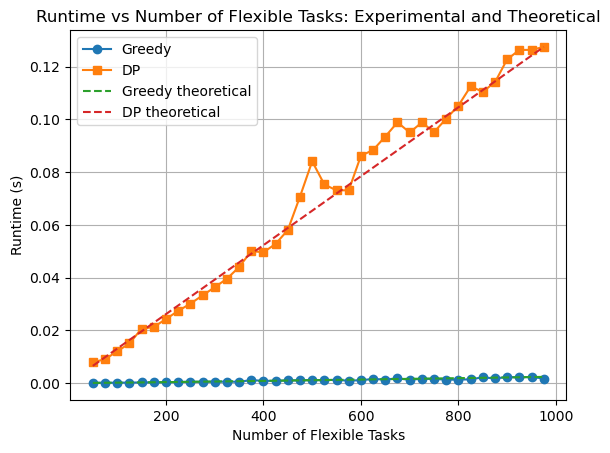

In [72]:
# Plot 1: flexible‐only
import numpy as np

sizes = np.arange(50, 1000, 25)
g1, d1 = measure(generate_flexible_tasks, sizes) 

# Raw theoretical curves
raw_greedy = sizes * np.log(sizes) # O(n logn)
raw_dp = sizes # O(n)

# Compute per‐algorithm scaling factors to normalize that
k_g = max(g1) / raw_greedy.max()
k_d = max(d1) / raw_dp.max()

# Scaled theoretical points
theo_g = k_g * raw_greedy 
theo_d = k_d * raw_dp

plt.figure()
plt.plot(sizes, g1, marker='o', label='Greedy')
plt.plot(sizes, d1, marker='s', label='DP')
plt.plot(sizes, theo_g, '--',   label='Greedy theoretical')
plt.plot(sizes, theo_d, '--',    label='DP theoretical')
plt.title("Runtime vs Number of Flexible Tasks: Experimental and Theoretical")
plt.xlabel("Number of Flexible Tasks")
plt.ylabel("Runtime (s)")
plt.legend()
plt.grid(True)


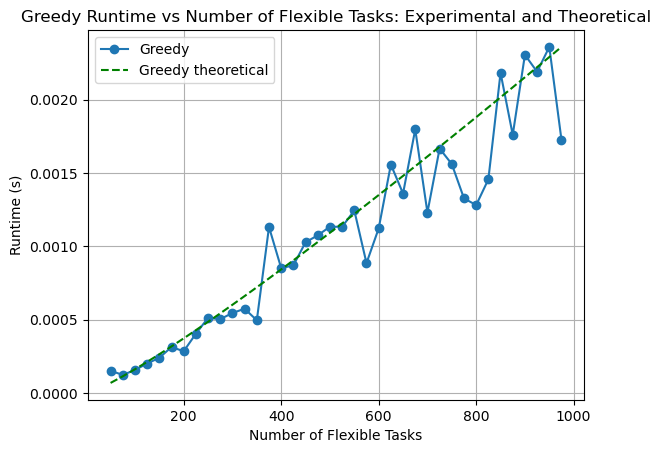

In [73]:
# Plot 1: with Greedy results only
plt.figure()
plt.plot(sizes, g1, marker='o', label='Greedy')
plt.plot(sizes, theo_g, '--', label='Greedy theoretical', color = 'g')
plt.title("Greedy Runtime vs Number of Flexible Tasks: Experimental and Theoretical")
plt.xlabel("Number of Flexible Tasks")
plt.ylabel("Runtime (s)")
plt.legend()
plt.grid(True)


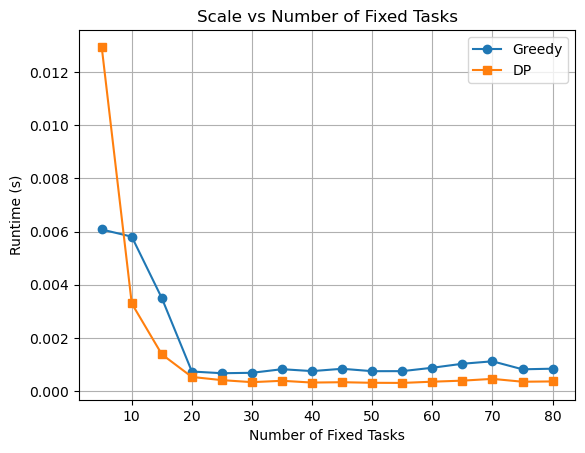

In [74]:
# Plot 2: mixed fixed
fixed_counts = list(range(5, 81, 5))
g2,d2 = measure(generate_mixed, fixed_counts)

plt.figure()
plt.plot(fixed_counts, g2, marker='o', label='Greedy')
plt.plot(fixed_counts, d2, marker='s', label='DP')
plt.title("Scale vs Number of Fixed Tasks")
plt.xlabel("Number of Fixed Tasks")
plt.ylabel("Runtime (s)")
plt.legend(); plt.grid(True)


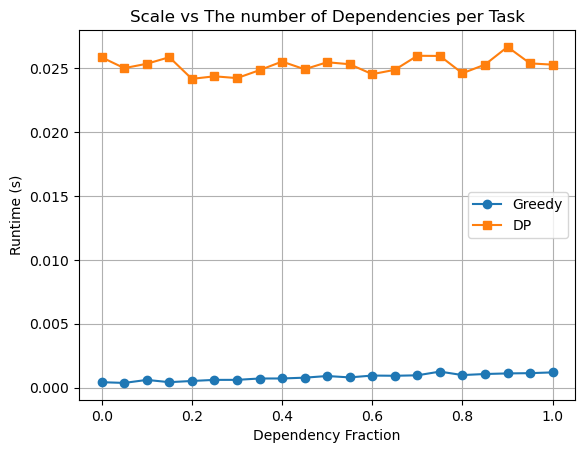

In [75]:
# Plot 3: dependency density
import numpy as np

fracs = np.linspace(0, 1, 21)
g3,d3 = measure(lambda f: generate_dependent_tasks(200,f), fracs)

plt.figure()
plt.plot(fracs, g3, marker='o', label='Greedy')
plt.plot(fracs, d3, marker='s', label='DP')
plt.title("Scale vs The number of Dependencies per Task")
plt.xlabel("Dependency Fraction")
plt.ylabel("Runtime (s)")
plt.legend(); plt.grid(True)